<a href="https://colab.research.google.com/github/EdenShaveet/Disclosure-Curriculum/blob/main/Module4_ModelCards_CancerClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module Exercise: Create a Model Card for a Healthcare Dataset

---


**Script Description:** Outputs a model card as an HTML page

**Script Attributions:** *Model Cards for Model Reporting* developed by [Mitchell et al. (2019)](https://arxiv.org/pdf/1810.03993.pdf). Script adapted from Google's [Scikit-Learn Model Card Toolkit Demo](https://github.com/tensorflow/model-card-toolkit/blob/master/model_card_toolkit/documentation/examples/Scikit_Learn_Model_Card_Toolkit_Demo.ipynb). 
Changes made to the original notebook include addition of comments, annotations, expansion/rephrasing of code block explanations, and re-arrangement of model evaluation steps. *All executable code has been left unchanged.*

**Instructions:** Sequentially execute cells to generate a model card for a grantient boosting classifier model using The Breast Cancer Wisconsin Diagnostic dataset. While manual disclosures are already provided, feel free to expand upon or revise them where you see the symbols "⬅️✏️." Refer to the Model Cards module in the MDSDPH curriculum for a detailed list of model disclosures.

##### Copyright 2020 The TensorFlow Authors.

In [15]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Background
This notebook demonstrates how to generate a model card using the Model Card Toolkit with a scikit-learn model in a Jupyter environment. Learn more about model cards at [https://modelcards.withgoogle.com/about](https://modelcards.withgoogle.com/about).

## Setup
The first thing we need to do is install and import the necessary packages. Let's start with installing a recent version of [pip](https://pip.pypa.io/en/latest/) (Python Package Index). We'll also be installing the [seaborn](https://pypi.org/project/seaborn/), [scikit-learn](https://pypi.org/project/scikit-learn/), and [model-card-toolkit](https://pypi.org/project/model-card-toolkit/) packages.

**NOTE: This cell may take a while to load!**

### Upgrade to Pip 20.2 and Install Packages

In [ ]:
!pip install --upgrade pip==21.3
!pip install -U seaborn scikit-learn model-card-toolkit

### Restart the runtime!

The first time that you run the above cell, you will need to restart the runtime in Colab. Select the "Restart Runtime" button when it appears.

### Import packages

Next, we need to import our necessary packages.

In [29]:
from datetime import date
from io import BytesIO
from IPython import display
import model_card_toolkit as mctlib
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid
from warnings import filterwarnings
filterwarnings('ignore')

## Import data

The [Breast Cancer Wisconsin Diagnostic dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) is a commonly used to teach about binary classification. Because of this, scikit-learn offers the Breast Cancer Wisconsin Diagnostic as a stock dataset by using the simple [load_breast_cancer()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) function. 

We will be using this dataset to train and test our classifier.

In [30]:
cancer = load_breast_cancer() # import dataset and assign as object "cancer" ⬅️🗂️

X = pd.DataFrame(cancer.data, columns=cancer.feature_names) # assign input data as object "X"
y = pd.Series(cancer.target) # assign classification target variable (malignancy) as object "y"

X_train, X_test, y_train, y_test = train_test_split(X, y) # split the dataset into training and testing data

In [31]:
X_train.head() # preview the first 5 rows of the training dataset containing features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
399,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,0.1847,0.06019,...,13.45,24.49,86.00,562.0,0.1244,0.1726,0.14490,0.05356,0.2779,0.08121
303,10.49,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,11.06,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842
323,20.34,21.51,135.90,1264.0,0.11700,0.18750,0.25650,0.15040,0.2569,0.06670,...,25.30,31.86,171.10,1938.0,0.1592,0.4492,0.53440,0.26850,0.5558,0.10240
262,17.29,22.13,114.40,947.8,0.08999,0.12730,0.09697,0.07507,0.2108,0.05464,...,20.39,27.24,137.90,1295.0,0.1134,0.2867,0.22980,0.15280,0.3067,0.07484
376,10.57,20.22,70.15,338.3,0.09073,0.16600,0.22800,0.05941,0.2188,0.08450,...,10.85,22.82,76.51,351.9,0.1143,0.3619,0.60300,0.14650,0.2597,0.12000


In [19]:
y_train.head() # preview the first 5 rows of the training cancer dataset containing classification target variable (1==benign; 0==malignant)

229    0
299    1
127    0
2      0
493    1
dtype: int64

## Plot data

We will create several plots from both the training and testing data to include in the model card.

In [32]:
# Utility function that will export a plot to a base-64 encoded string that the model card will accept.

def plot_to_str():
    img = BytesIO()
    plt.savefig(img, format='png')
    return base64.encodebytes(img.getvalue()).decode('utf-8')

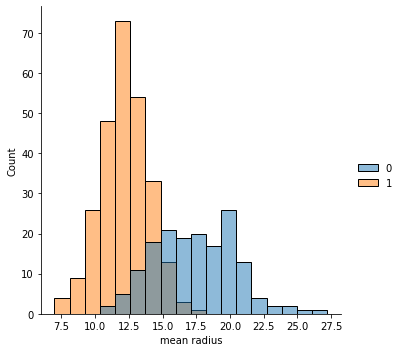

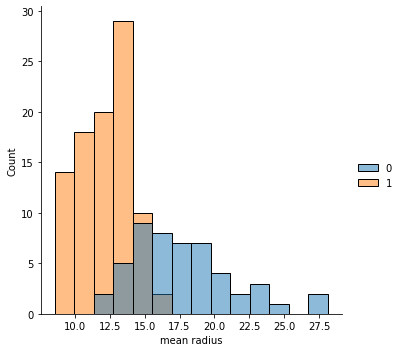

In [33]:
# Plot the mean radius feature as overlaying histograms for both the train and test sets

# Training set
sns.displot(x=X_train['mean radius'], hue=y_train)
mean_radius_train = plot_to_str()

#Testing set
sns.displot(x=X_test['mean radius'], hue=y_test)
mean_radius_test = plot_to_str()

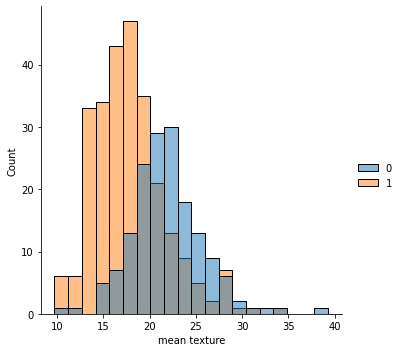

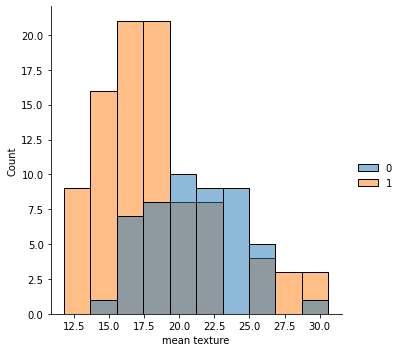

In [34]:
# Plot the mean texture feature for both the train and test sets

# Training set
sns.displot(x=X_train['mean texture'], hue=y_train)
mean_texture_train = plot_to_str()

#Testing set
sns.displot(x=X_test['mean texture'], hue=y_test)
mean_texture_test = plot_to_str()

## Train model

For this example, we are creating a [Gradient Boosting Classifier](https://medium.com/analytics-vidhya/introduction-to-gradient-boosting-classification-da4e81f54d3).

In [35]:
# Create classifier and fit the training data

clf = GradientBoostingClassifier().fit(X_train, y_train)

## Evaluate model

To evaluate our classifier, we first display our [confusion matrix](https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative) which shows the 2x2 matrix of the classifier's predicted values to the dataset's true values.

Using the values contained in our matrix, we then plot a [Receiver Operating Characteristic (ROC) curve](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) which shows the performance of a classifier by plotting two parameters: 

1.) True Positive Rate

2.) False Positive Rate

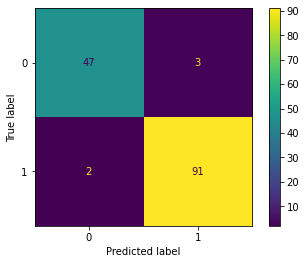

In [36]:
# Plot a confusion matrix

plot_confusion_matrix(clf, X_test, y_test)
confusion_matrix = plot_to_str()

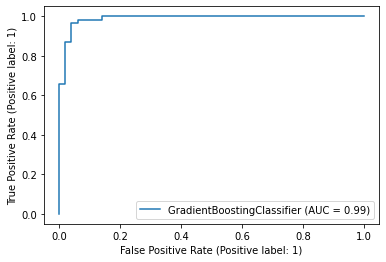

In [37]:
# Plot a ROC curve

plot_roc_curve(clf, X_test, y_test)
roc_curve = plot_to_str()

## Create a model card

### Initialize toolkit and model card

The following cell initializes the model card toolkit for later use.

In [38]:
mct = mctlib.ModelCardToolkit() #Assign as object "mct"

model_card = mct.scaffold_assets() #Assign as object "model_card"

### Annotate information into model card

In [39]:
###⬅️✏️Assign model card name as string
model_card.model_details.name = 'Breast Cancer Wisconsin (Diagnostic) Dataset'
###⬅️✏️Provide model description as string
model_card.model_details.overview = (
    'This model predicts whether breast cancer is benign or malignant based on ' 
    'image measurements.')
# Disclosre model card ownership (name and contact) as strings
model_card.model_details.owners = [
    mctlib.Owner(name= 'Model Cards Team', contact='model-cards@google.com')
]
# Provide model references as string URLs
model_card.model_details.references = [
    mctlib.Reference(reference='https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)'),
    mctlib.Reference(reference='https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf')
]
# Provide model card version details as universally unique identifier (UUID) (outputs as string)
model_card.model_details.version.name = str(uuid.uuid4())
# Indicate model card creation date (outputs today's date as string)
model_card.model_details.version.date = str(date.today())
# Disclose ethical considerations
model_card.considerations.ethical_considerations = [mctlib.Risk(
    name=('Manual selection of image sections to digitize could create '
            'selection bias'), ###⬅️✏️ Disclose risks as string 
    mitigation_strategy='Automate the selection process' ###⬅️✏️ Disclose mitigation strategies as string
)]
model_card.considerations.limitations = [mctlib.Limitation(description='Breast cancer diagnosis')] ###⬅️✏️ Disclose model limitations as string
model_card.considerations.use_cases = [mctlib.UseCase(description='Breast cancer diagnosis')] ###⬅️✏️ Disclose model use cases as string
model_card.considerations.users = [mctlib.User(description='Medical professionals'), mctlib.User(description='ML researchers')] ###⬅️✏️ Disclose intended users as strings

# Diplay mean radius and mean texture histograms for training data in model card
model_card.model_parameters.data.append(mctlib.Dataset())
model_card.model_parameters.data[0].graphics.description = (
  f'{len(X_train)} rows with {len(X_train.columns)} features')
model_card.model_parameters.data[0].graphics.collection = [
    mctlib.Graphic(image=mean_radius_train),
    mctlib.Graphic(image=mean_texture_train)
]

# Diplay mean radius and mean texture histograms for testing data in model card
model_card.model_parameters.data.append(mctlib.Dataset())
model_card.model_parameters.data[1].graphics.description = (
  f'{len(X_test)} rows with {len(X_test.columns)} features')
model_card.model_parameters.data[1].graphics.collection = [
    mctlib.Graphic(image=mean_radius_test),
    mctlib.Graphic(image=mean_texture_test)
]

# Diplay ROC curve and confusion matrix in model card
model_card.quantitative_analysis.graphics.description = (
  'ROC curve and confusion matrix')
model_card.quantitative_analysis.graphics.collection = [
    mctlib.Graphic(image=roc_curve),
    mctlib.Graphic(image=confusion_matrix)
]

mct.update_model_card(model_card)

## Generate model card

In [40]:
# Return model card as an HTML page

html = mct.export_format()

display.display(display.HTML(html))